## Mobile Price Classification

Ashwini Dharmarajan     002953107 \n
Srikar Veldandi               001563236
Shruthi A                         002112912
Sharanya Maryada         002921192


In this project we are trying to classify mobiles based on the price range. We use features like battery power, bluetooth enabled, 4g, 3g, RAM, internal memory etc to do the classification. We predict 4 price ranges -
0 - Low cost, 1 - Medium cost 2 - High cost 3 - Very high cost. This could be used by mobile manufacturing companies to predict price range of mobiles with various features and help understand competition. It can also be used by customers of mobiles to check if the features they require in a mobile are available in a particular price range.



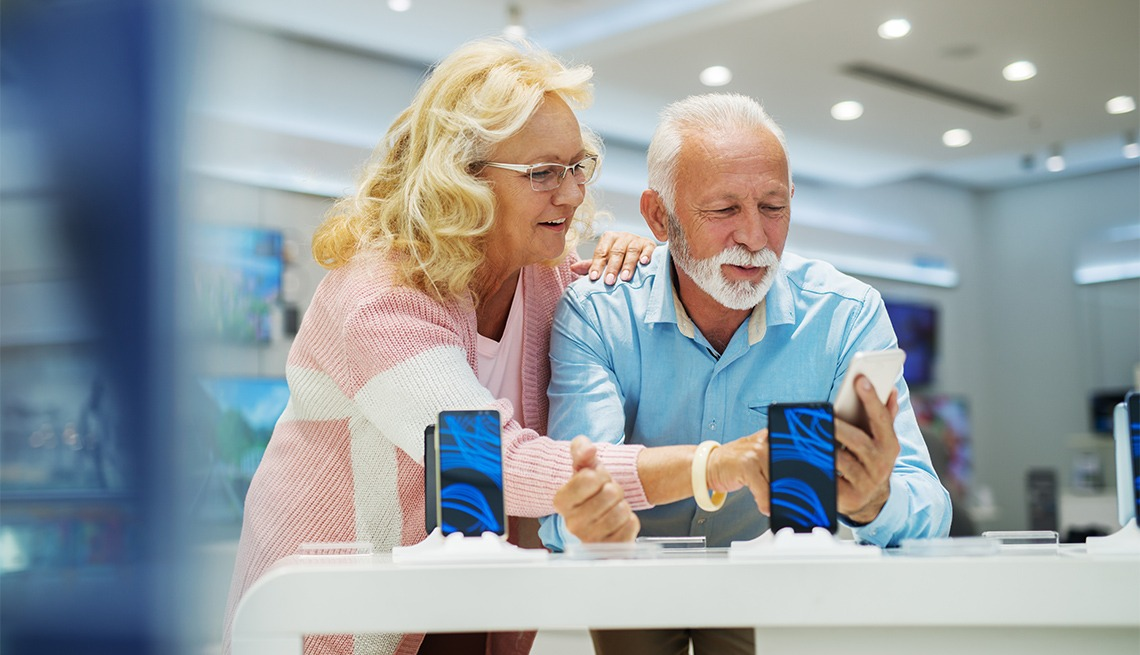

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

For this project we used a dataset from Kaggle - https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification. This dataset provides data with 21 features. We use the price_range label as the target value. 

In [2]:
#Importing the dataset
df_train = pd.read_csv('train.csv')

In [3]:
#Shows the first 5 records of the dataset
df_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
#Last 5 records
df_train.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

## This dataset has a total of 2000 records with 21 features including the target

In [5]:
df_train.shape

(2000, 21)

## Datatype
Below is the datatype of all the features. All features are either int or float

In [6]:
df_train.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## Data Count
There are no missing values in the dataset.Each feature has 2000 values

In [7]:
df_train.count()


battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

## Rename column
Renamed column blue to bluetooth to make it more intuitive.

In [8]:
df_train.rename(columns = {'blue':'bluetooth'},inplace = True)
df_train

battery_power  bluetooth  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842          0          2.2         0   1       0           7   
1              1021          1          0.5         1   0       1          53   
2               563          1          0.5         1   2       1          41   
3               615          1          2.5         0   0       0          10   
4              1821          1          1.2         0  13       1          44   
...             ...        ...          ...       ...  ..     ...         ...   
1995            794          1          0.5         1   0       1           2   
1996           1965          1          2.6         1   0       0          39   
1997           1911          0          0.9         1   1       1          36   
1998           1512          0          0.9         0   4       1          46   
1999            510          1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

## Columns of the dataset:  
#id: ID  
#battery_power: Total energy a battery can store in one time measured in mAh  
#bluetooth: Has bluetooth or not  
#clock_speed: Speed at which microprocessor executes instructions  
#dual_sim: Has dual sim support or not  
#fc: Front Camera mega pixels  
#four_g: Has 4G or not  
#int_memory: Internal Memory in Gigabytes  
#m_dep: Mobile Depth in cm  
#mobile_wt: Weight of mobile phone  
#n_cores: Number of cores of processor  
#pc: Primary Camera mega pixels  
#px_height: Pixel Resolution Height  
#px_width: Pixel Resolution Width  
#ram: Random Access Memory in Megabytes  
#sc_h: Screen Height of mobile in cm  
#sc_w: Screen Width of mobile in cm  
#talk_time: Longest time that a single battery charge will last when you are  
#three_g: Has 3G or not  
#touch_screen: Has touch screen or not  
#wifi: Has wifi or not  

## Description of data
Below, we can see the statistical information of the numeric data in the dataset

In [9]:
df_train.describe()

battery_power  bluetooth  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

## General info about the dataset
This prints the general information about the dataset.The dataset has 2000 entries. It has values for all 21 features in the 2000 entries. Datatypes are either integer or float

In [10]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Another way of detecting missing values 
The result shows that there are no missing/null values and therefore does not need further cleaning

In [11]:

df_train.isnull().sum()


battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Target Outcomes
There are 4 possible outcomes in the pridiction of price range - 0,1,2,3.
0(Low Price), 1(Medium Price), 2(High Price), 3(Very high price)

In [12]:

df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

## Distribution of the target outcomes
The target feature 'price range' has 4 values - 0,1,2,3. The below plot shows the distribution of these values in the dataset. We found that the distribution of the values are the same in all the 4 categories.

<AxesSubplot:xlabel='price_range', ylabel='count'>

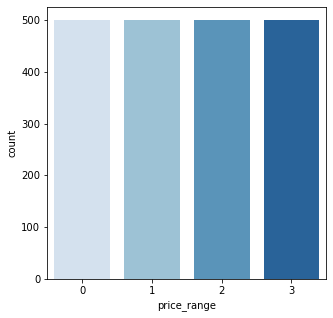

In [13]:

plt.figure(figsize=(5,5))
sns.countplot(x=df_train['price_range'],palette='Blues',linewidth=1)

## Distribution of data in various features 

## 1. Count plot for bluetooth

From the below graph we can infer that the count of mobiles in each price range is almost the same irrespective of the availabilty of bluetooth in a mobile

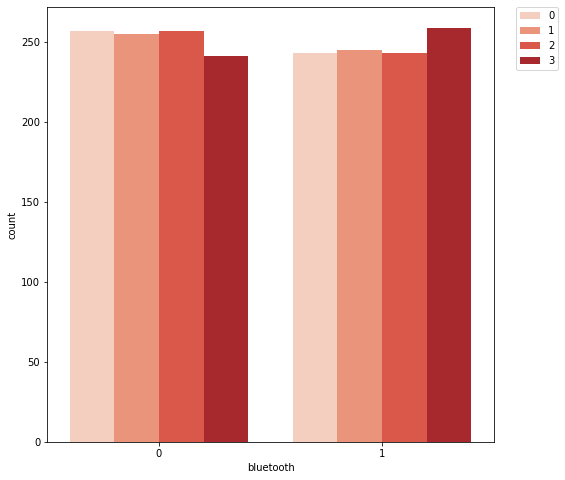

In [14]:
#Count plot to find count of mobiles which have bluetooth(1) and which donot have bluetooth(0) in each price range
plt.figure(figsize=(8,8))
sns.countplot(data=df_train, x = 'bluetooth',palette='Reds',hue='price_range');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 2. Count plot for Dual Sim
From this count plot we do not see a drastic variation between single sim and dual sim. But we see a slight variation. The count of mobiles with dual sim in the high price range is higher than in lower price ranges

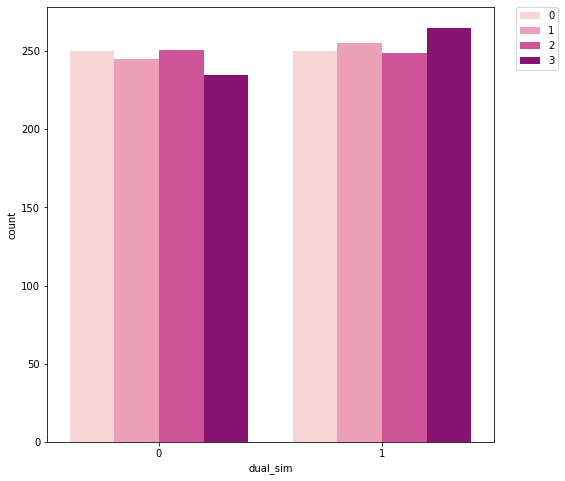

In [15]:
#Count plot to find count of mobiles which have dualsim(1) and which donot have dualsim(0) in each price range
plt.figure(figsize=(8,8))
sns.countplot(data=df_train, x = 'dual_sim',palette='RdPu',hue='price_range');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. Count plot for 4g
The data distribution is almost uniform. There are a higher number of mobiles with 4g in the highest price range.

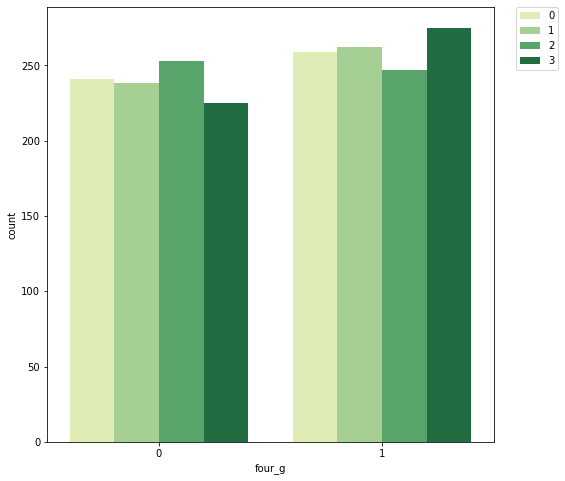

In [16]:
#Count plot to find count of mobiles which have 4g(1) and which donot have 4g(0) in each price range
plt.figure(figsize=(8,8))
sns.countplot(data=df_train, x = 'four_g',palette='YlGn',hue='price_range');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 4. Count plot for Cores
There cores of mobiles range from 1 to 8. The plot shows the count of mobiles with each type of core in all the price ranges 

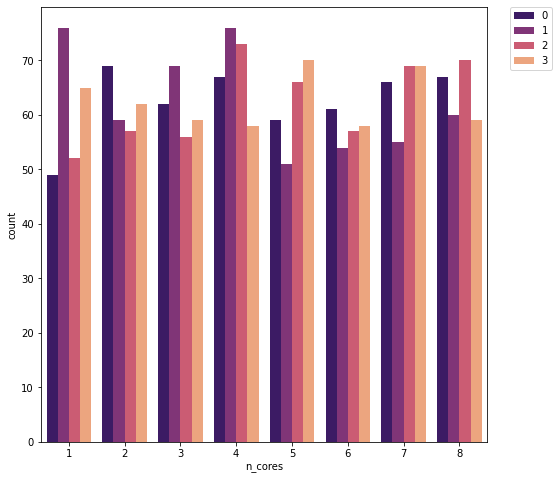

In [17]:
#Count plot to find count of mobiles having different cores(from 1 to 8) in each price range
plt.figure(figsize=(8,8))
sns.countplot(data=df_train, x = 'n_cores', palette='magma',hue='price_range');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 5. Count plot for wifi
We see that there is no much variance for the count of mobiles with and without wifi

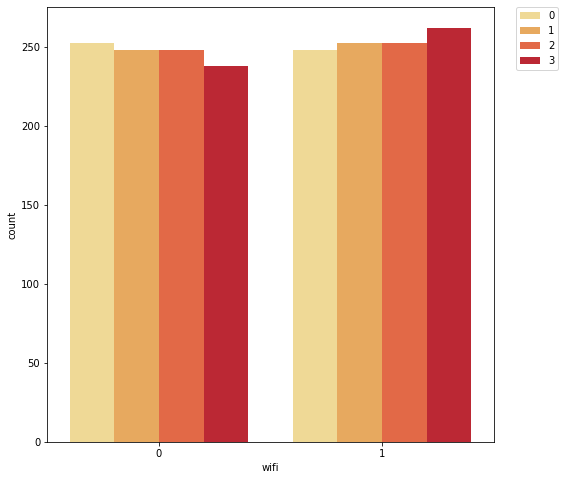

In [18]:
#Count plot to find count of mobiles which have wifi(1) and which donot have wifi(0) in each price range
plt.figure(figsize=(8,8))
sns.countplot(data=df_train, x = 'wifi',palette ='YlOrRd',hue='price_range');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 6. Piechart for 3g support
We can infer that most mobiles in the dataset support 3g

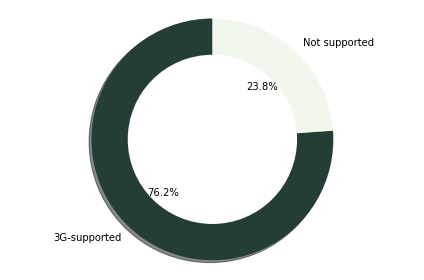

In [19]:
labels = ["3G-supported",'Not supported']
values=df_train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
#colors
colors = ['#243e36','#f1f7ed','#7ca982','#e0eec6']
ax1.pie(values,colors = colors, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.show()

## 7. Piechart for 4g support
From this piechart we can infer that almost half the phones support 4g and half the phones dont support 4g

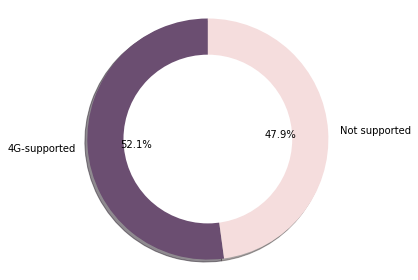

In [20]:
labels4g = ["4G-supported",'Not supported']
values4g = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
#colors
colors = ['#6b4e71','#f5dddd','#99ff99','#ffcc99']
ax1.pie(values4g,colors = colors, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 8. Relationship between price_range and RAM
We plot a pointplot to check the relationship between RAM and price_rance. We see a linear relationship between the two parameters indicating that higher the RAM of a mobile higher is the price_range

<AxesSubplot:xlabel='price_range', ylabel='ram'>

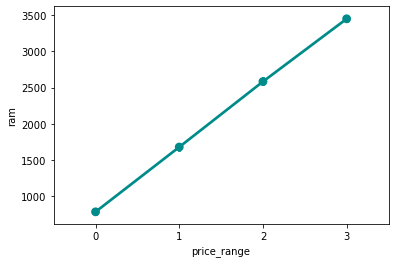

In [21]:
sns.pointplot(y='ram',x='price_range',color='darkcyan',data=df_train)

## 9. Relationship between price_range and mobile weight
We plot a pointplot to analyse this relationship. We see that low and medium range phones have similar weights. The weight for high price phones are higher. The costliest phones ie mobiles in range 3 have the lowest weight

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

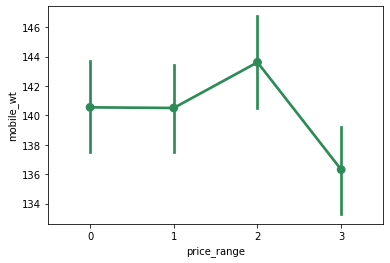

In [22]:
sns.pointplot(y='mobile_wt',x='price_range',color='seagreen',data=df_train)

## 10. Relationship between Battery and Price Range
We use a boxplot to visualize this relationship.We see that as the price range increases that battery power also increases


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

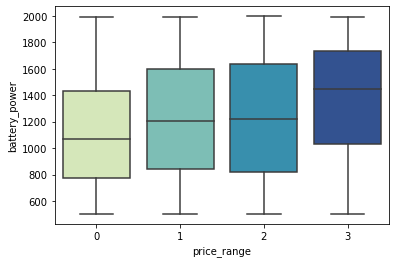

In [23]:
sns.boxplot(x='price_range',y='battery_power',palette='YlGnBu',data=df_train)

## 11. Relationship between Price Range and Internal Memory
Relationship between internal memory and price range is obtained using a pointplot. It has a general upward trend except in price range 2. The costliest mobiles have the highest internal memory

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

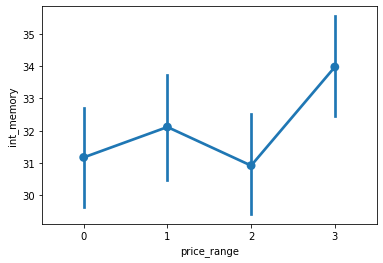

In [24]:

sns.pointplot(x='price_range',y='int_memory',data=df_train)

## Correlation using Heatmap
From the heatmap below we can infer that price_range has a high positive correlation with RAM (higher the RAM, higher the price) followed by px_height and px_width whereas clock_speed three_g, four_g, n_cores have very less correlation with price_range

<AxesSubplot:>

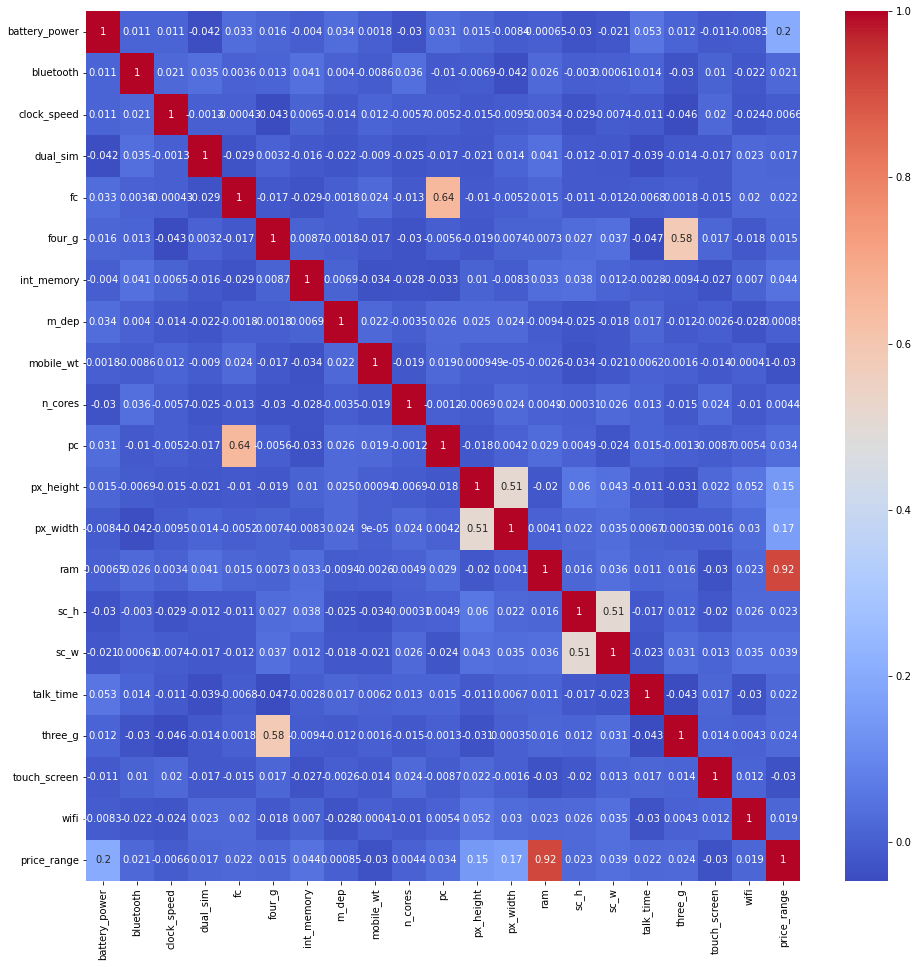

In [25]:
plt.figure(figsize=(16,16))
sns.heatmap (df_train.corr (),annot = True, cmap="coolwarm")


## Pairplot

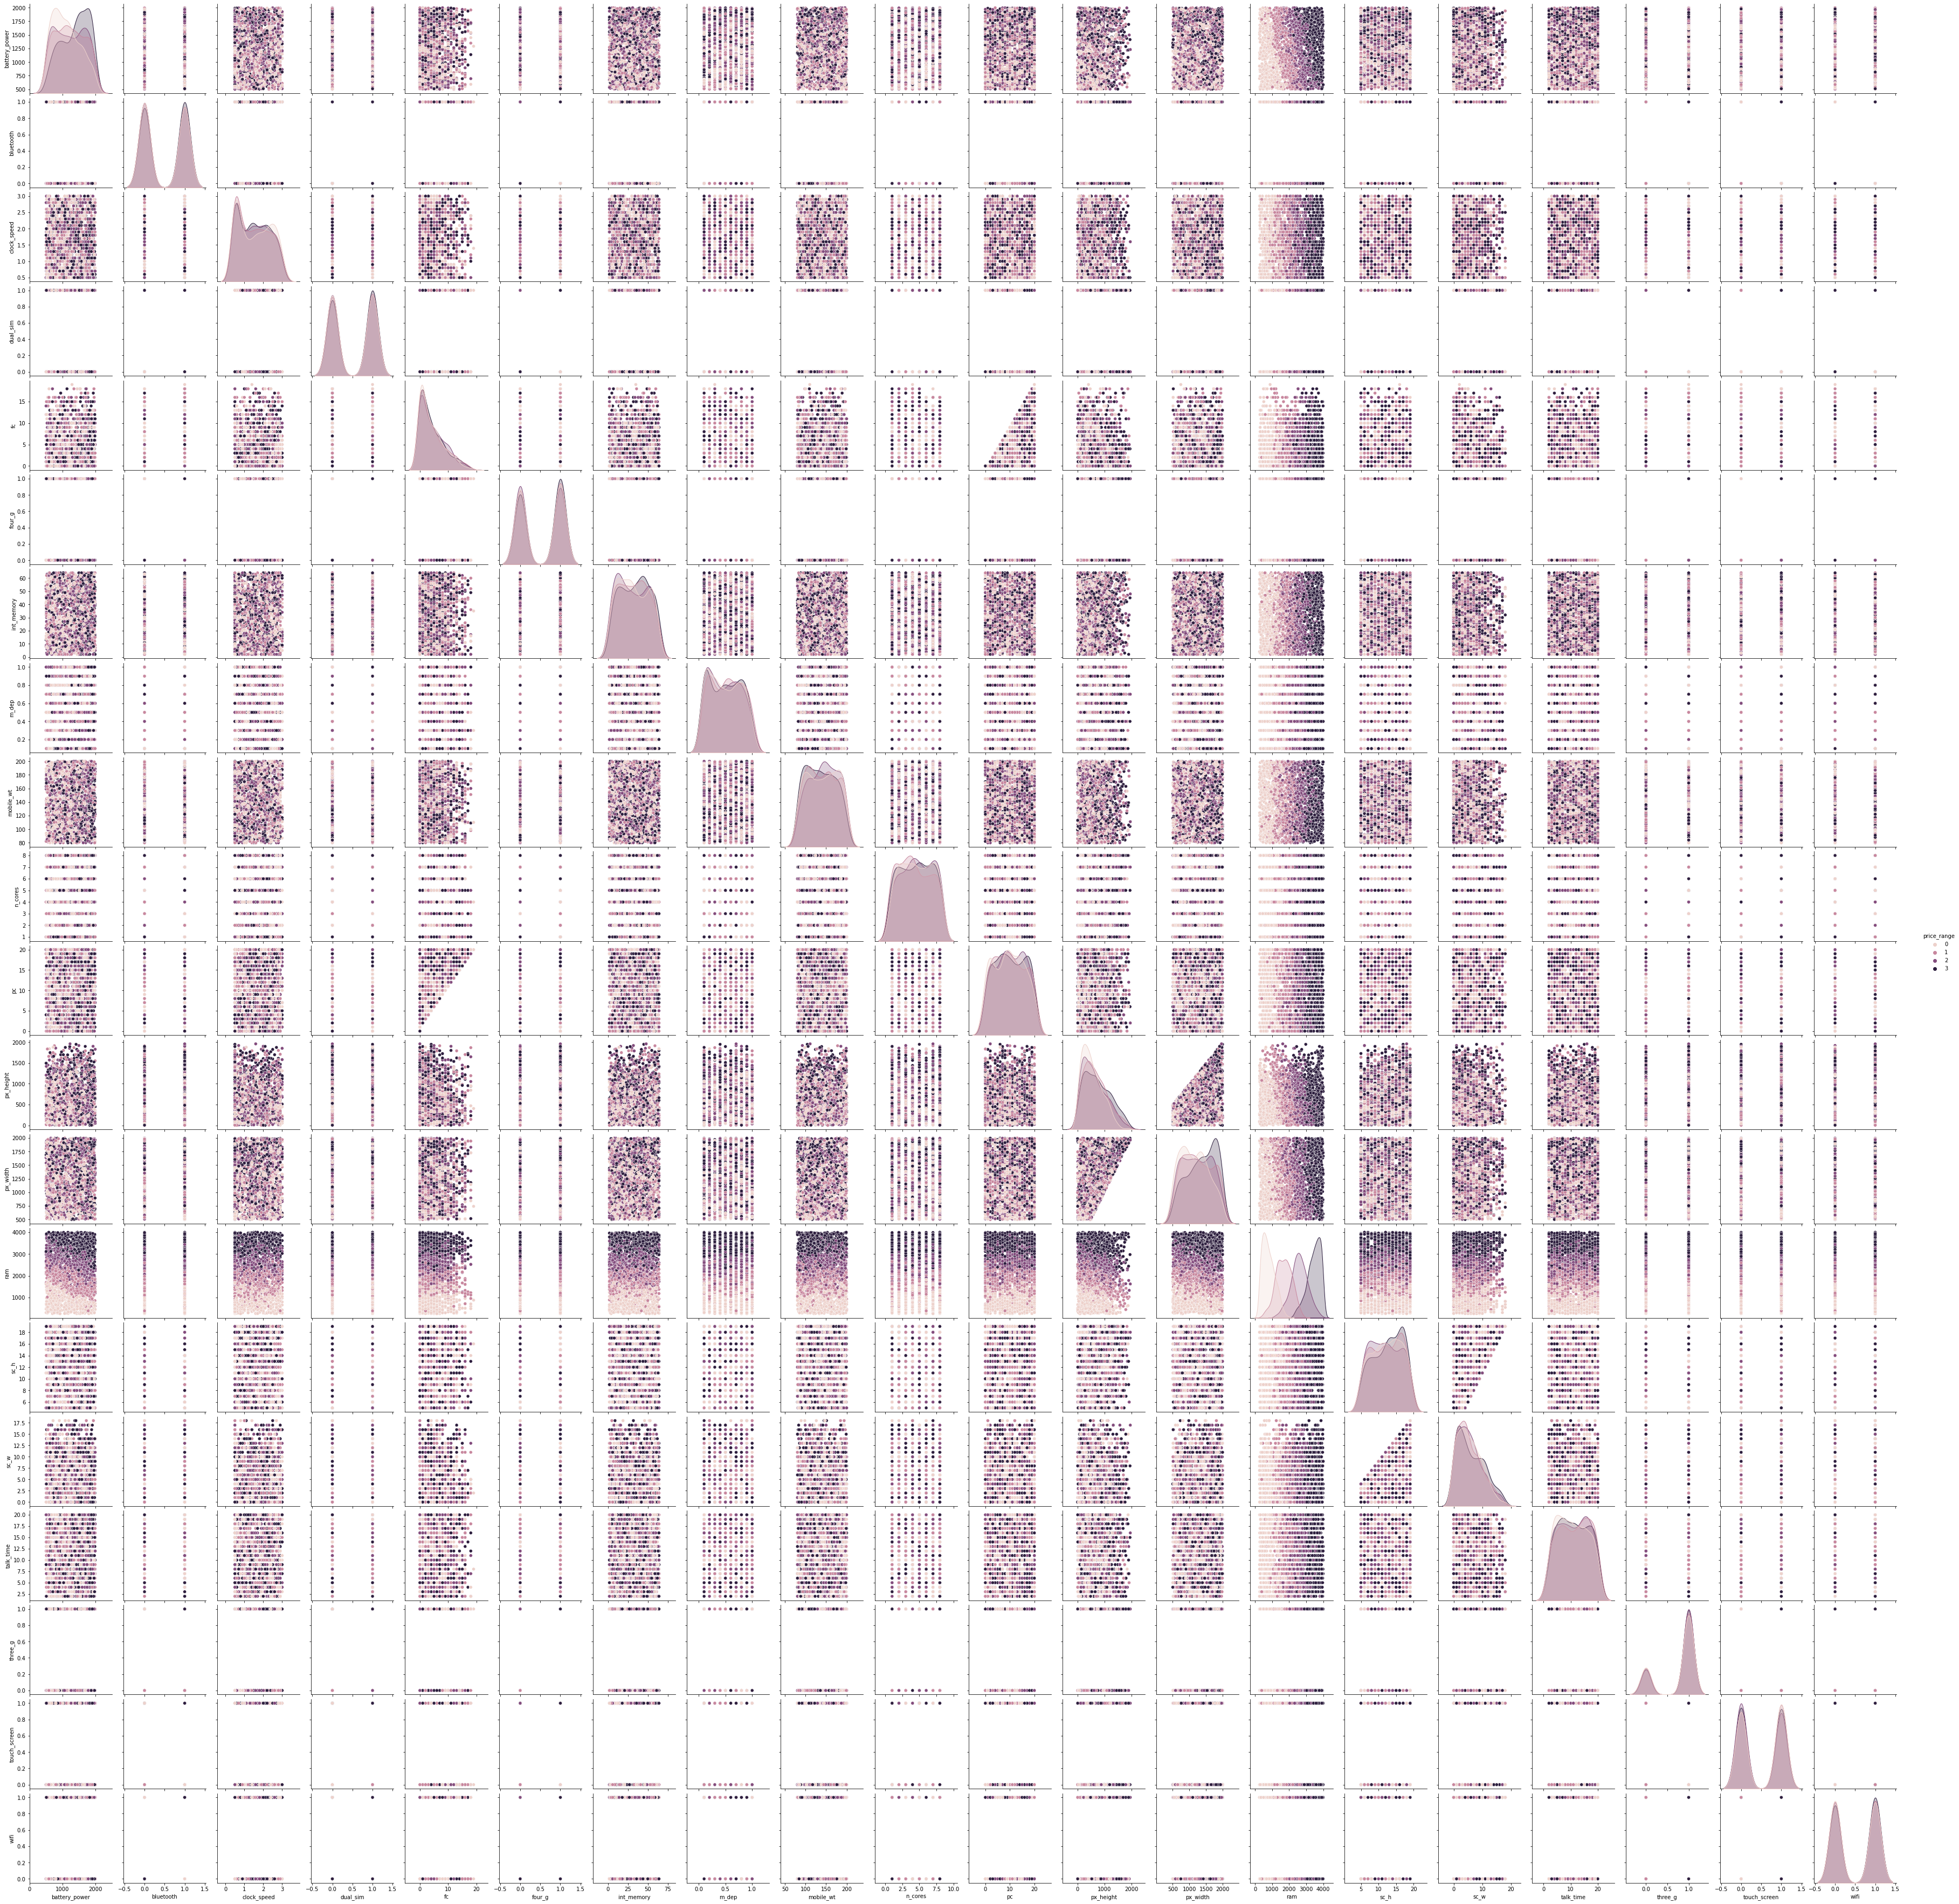

In [26]:
sns.pairplot(df_train,hue='price_range')

## Feature Importance
Feature Importance using RandomForestClassifer - We use feature_importance property of this classifier to display the importance of the fetures.Scores of the importance is printed in the descending order. The results show that ram, battery_power, px_width, px_height have highest importance whereas wifi, blue, four_g, three_g have lowest importance.

In [27]:
X = df_train.drop('price_range', axis=1)
Y = df_train['price_range']
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(X,Y)
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

ram              0.488472
battery_power    0.074729
px_width         0.057197
px_height        0.056161
mobile_wt        0.038879
int_memory       0.034277
talk_time        0.030294
pc               0.029146
sc_w             0.028154
clock_speed      0.026912
sc_h             0.026544
fc               0.024680
m_dep            0.024145
n_cores          0.022105
touch_screen     0.007056
dual_sim         0.006724
four_g           0.006443
bluetooth        0.006427
wifi             0.006416
three_g          0.005241
dtype: float64

## Drop features
Based on the analysis above, we dropped 4 features with the least importance. 

In [28]:
X_Train = df_train.drop(['three_g','four_g','bluetooth','wifi'], axis=1)
X_Train

battery_power  clock_speed  dual_sim  fc  int_memory  m_dep  mobile_wt  \
0               842          2.2         0   1           7    0.6        188   
1              1021          0.5         1   0          53    0.7        136   
2               563          0.5         1   2          41    0.9        145   
3               615          2.5         0   0          10    0.8        131   
4              1821          1.2         0  13          44    0.6        141   
...             ...          ...       ...  ..         ...    ...        ...   
1995            794          0.5         1   0           2    0.8        106   
1996           1965          2.6         1   0          39    0.2        187   
1997           1911          0.9         1   1          36    0.7        108   
1998           1512          0.9         0   4          46    0.1        145   
1999            510          2.0         1   5          45    0.9        168   

      n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0           2   2         20       756  2549     9     7         19   
1           3   6        905      1988  2631    17     3          7   
2           5   6       1263      1716  2603    11     2          9   
3           6   9       1216      1786  2769    16     8         11   
4           2  14       1208      1212  1411     8     2         15   
...       ...  ..        ...       ...   ...   ...   ...        ...   
1995        6  14       1222      1890   668    13     4         19   
1996        4   3        915      1965  2032    11    10         16   
1997        8   3        868      1632  3057     9     1          5   
1998        5   5        336       670   869    18    10         19   
1999        6  16        483       754  3919    19     4          2   

      touch_screen  price_range  
0                0            1  
1                1            2  
2                1            2  
3                0            2  
4                1            1  
...            ...          ...  
1995             1            0  
1996             1            2  
1997             1            3  
1998             1            0  
1999             1            3  

[2000 rows x 17 columns]

## Splitting train and test data
We split the data 80% for training and 20% for testing

In [29]:
x_features = df_train.drop('price_range', axis=1)
y_label = df_train['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=101)

## Random Forest Classifier 
We trained the data using Random Forest Classifier. We tested the hyperparameter n_estimator with values 100, 150, 200 and 250. n_estimator of 150 gives us the be best score of 0.89. We then generated the classification report and confusion matrix.

In [50]:
#Random Forest Classifier with n_estimator 100
from sklearn.ensemble import RandomForestClassifier
rfc_100 = RandomForestClassifier(n_estimators=100)
rfc_100.fit(X_train, y_train)

# Get the mean accuracy score for test set
rfc_100.score(X_test,y_test)*100

88.0

In [51]:
#Random Forest Classifier with n_estimator 150
from sklearn.ensemble import RandomForestClassifier
rfc_150 = RandomForestClassifier(n_estimators=150)
rfc_150.fit(X_train, y_train)
rfc_150.score(X_test,y_test)*100

88.0

In [52]:
#Random Forest Classifier with n_estimator 200
from sklearn.ensemble import RandomForestClassifier
rfc_200 = RandomForestClassifier(n_estimators=200)
rfc_200.fit(X_train, y_train)
rfc_200.score(X_test,y_test)*100

89.0

In [53]:
#Random Forest Classifier with n_estimator 250
from sklearn.ensemble import RandomForestClassifier
rfc_250 = RandomForestClassifier(n_estimators=250)
rfc_250.fit(X_train, y_train)
rfc_250.score(X_test,y_test)*100

88.25

## Classification report 
Precision and Recall look reasonable for label 0 and 3
Label 1 and 2 seem to have lower precision and lower recall respectively as can be also observed from F1 score.


In [54]:
#Classification report and confusion matrix for random forest classifier with the best hyperparameter
from sklearn.metrics import classification_report, confusion_matrix
y_predict = rfc_200.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.96      0.93      0.94        94
           1       0.78      0.89      0.83       102
           2       0.90      0.78      0.84       120
           3       0.92      0.95      0.94        84

    accuracy                           0.88       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



# Confusion Matrix
The principal diagonal is looking good showing overall True positive is good
The value 13 and 10 seems statistically significant, so improving the prediction between 1 and 2 label will boost overall metrics of the model


In [55]:
print(confusion_matrix(y_test, y_predict))



[[87  7  0  0]
 [ 4 91  7  0]
 [ 0 19 94  7]
 [ 0  0  4 80]]


## Decision Tree Classifier 
We train the data using Decision Tree Classifier. We tested the hyperparameter  max_depth with values 5, 7 and 10. max_depth of 10 gives us the be best score of 0.99. We then generated the classification report and confusion matrix.

In [36]:
#Decision Tree Classifier with max_depth = 5
from sklearn.tree import DecisionTreeClassifier
dtree_5 = DecisionTreeClassifier(max_depth=5)
dtree_5.fit(X_train,y_train)
dtree_5.score(X_train,y_train)*100

88.875

In [37]:
#Decision Tree Classifier with max_depth = 7
from sklearn.tree import DecisionTreeClassifier
dtree_7 = DecisionTreeClassifier(max_depth=7)
dtree_7.fit(X_train,y_train)
dtree_7.score(X_train,y_train)*100

96.875

In [38]:
#Decision Tree Classifier with max_depth = 10
from sklearn.tree import DecisionTreeClassifier
dtree_10 = DecisionTreeClassifier(max_depth=10)
dtree_10.fit(X_train,y_train)
dtree_10.score(X_train,y_train)*100

99.875

In [39]:
#Decision Tree Classifier with max_depth = 15
from sklearn.tree import DecisionTreeClassifier
dtree_15 = DecisionTreeClassifier(max_depth=10)
dtree_15.fit(X_train,y_train)
dtree_15.score(X_train,y_train)*100

99.875

## Classification Report and Confusion Matrix
Precision and Recall look reasonable for label 0 and 3
Label 1 and 2 seem to have lower precision and lower recall respectively as can be also observed from F1 score.

The principal diagonal of the confusion matrix is looking good showing overall True positive.
The value 18 and 9 seems statistically significant, so improving the prediction between 1 and 2 label will boost overall metrics of the model

In [40]:
y_predict = dtree_10.fit(X_train, y_train).predict(X_test)

In [41]:
#Classification report and confusion matrix for decision tree classifier
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        94
           1       0.72      0.84      0.78       102
           2       0.85      0.71      0.77       120
           3       0.83      0.93      0.88        84

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.82      0.82       400

[[80 14  0  0]
 [ 7 86  9  0]
 [ 0 19 85 16]
 [ 0  0  6 78]]


## KNN Classifier 
We train the data using KNN Classifier. We tested the hyperparameter n_neighbors with values 7, 10 and 15. n_neighbors of 10 gives us the be best score of 0.95. We then generated the classification report and confusion matrix.


In [42]:
#KNN Classifier with n_neighbors = 7
from sklearn.neighbors import KNeighborsClassifier
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)
knn_7.score(X_train, y_train)*100

94.75

In [43]:
#KNN Classifier with n_neighbors = 10
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)
knn_10.score(X_train, y_train)*100

95.0

In [44]:
#KNN Classifier with n_neighbors = 15
from sklearn.neighbors import KNeighborsClassifier
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train,y_train)
knn_15.score(X_train, y_train)*100

94.9375

## Classification Report and Confusion Matrix
Precision and Recall look reasonable for label 0 and 3
Label 1 and 2 seem to have lower precision and lower recall respectively as can be also observed from F1 score.


The principal diagonal of the confusion matrix is looking good showing overall True positive.
The value 11,5 and 5 seems statistically significant, so improving the prediction between 1 and 2 label will boost overall metrics of the model

In [45]:
#Classification report and confusion matrix for KNN classifier
y_predict = knn_10.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        94
           1       0.88      0.94      0.91       102
           2       0.94      0.88      0.91       120
           3       0.96      0.94      0.95        84

    accuracy                           0.93       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.93      0.93      0.93       400

[[ 92   2   0   0]
 [  4  96   2   0]
 [  0  11 106   3]
 [  0   0   5  79]]


## Conclusion
After training 3 models - Random Forest, Decision Tree and K neighbors we see that the best model for this classification problem is Decision Tree followed by KNN. In the classification report we see that precision and recall for price range 1 and 2 is relatvely low where as for 0 and 3 it is good. More features is perhaps needed to boost the P/R here as the data label distribution is equal among 4 classes.